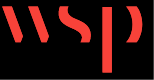

#### Prepared by Nick Mirsepassi - Date 25/08/2025

#### Sharaan Resort - Front B - Upper and Lower Galleries Design Package

# Shotcrete Panel Design – Barrett & McCreath (1995) and Christine et al. (2017)

This notebook follows the shotcrete panel design approach introduced by **Barrett & McCreath (1995)** and later refined by **Christine, Oliveira & Asche (2017)**.  
The design checks ensure that a fibre-reinforced shotcrete (FRS) panel spanning between rock bolts is safe against four key failure modes:

1. **Adhesion failure** – loss of bond between shotcrete and rock.  
2. **Direct shear failure** – sliding along a shear plane through the shotcrete.  
3. **Flexural bending failure** – bending between bolts.  
4. **Punching shear failure** – punching around the bolt plate.  

The factors of safety (FoS) are evaluated as:

$$
FoS = \frac{\text{SRF} \cdot \text{Capacity}}{\text{LF} \cdot \text{Demand}}
$$

where **SRF** is the strength reduction factor and **LF** is the load factor.

---

## Loads
Two models are used to define the load acting on the shotcrete panel:

- **Overbreak/slab model**:  
  $$
  W = \gamma \, h \, s^2
  $$
  where $\gamma$ is rock unit weight, $h$ is loosened rock thickness, and $s$ is bolt spacing.  

- **Wedge/block model**:  
  $$
  W = \gamma \, \frac{\sqrt{6}\,s^3}{6}
  $$

Additional loads include:
- Shotcrete self-weight:  
  $$
  W_{sc} = \rho_{sc} \, t \, s^2
  $$
  with $\rho_{sc} \approx 22.5 \, \text{kN/m}^3$.  
- Surcharge: $W_q = q \, s^2$  
- Groundwater: $W_{qw} = q_w \, s^2$

---

## Adhesion Capacity
Adhesion is governed by the bond between shotcrete and rock:

$$
C_a = 4 \, \sigma_a \, s \, a
$$

- $\sigma_a$: adhesion stress (depends on surface conditions, "poor" or "good").  
- $a$: adhesion length.

---

## Direct Shear Capacity (Christine et al., Eq. 12–13)
Direct shear strength is the sum of a **compressive term** and a **fibre term**:
$$
\tau_{ds} \;=\; \tau_c \;+\; \tau_f
$$
with
$$
\tau_c \;=\; 0.15\, f_c^{1/3}, 
\qquad
\tau_f \;=\; \frac{0.12\,k_f\,k_d\,f_{eq}}{0.37},
\qquad
k_d \;=\; \max\!\big(1.6 - t_{\text{eff}},\,1.0\big).
$$
The **capacity** is
$$
C_{ds} \;=\; 4\,\tau_{ds}\,s\,t_{\text{eff}},
\qquad
t_{\text{eff}} \;=\; t - CL.
$$

---

## Flexural Capacity (Christine et al., Eq. 10; B&M strip)
Flexural strength from tests:
$$
\sigma_{fl} \;=\; \min\!\big(0.6\sqrt{f_c},\; f_{eq}\big),
\qquad
t_{\text{eff}} \;=\; t - CL.
$$
For **capacity**, the strip model uses an effective bending stress
$$
\sigma_{fl,\text{eff}} \;=\; 0.5\,\sigma_{fl},
$$
and
$$
C_{fl} \;=\; \sigma_{fl,\text{eff}} \;\frac{t_{\text{eff}}^{\,2}}{6}\;\frac{s}{2}.
$$
**Demand** (Barrett & McCreath):
$$
M_d \;=\; \frac{LF\,\big(W_{\text{rock}} + W_q\big)\,s}{8}
\left(\frac{s - 0.7\,c}{s}\right)^2 \, m_c,
$$
where \(m_c=0.65\) if a connected plate is assumed.

---

## Punching Shear Capacity (Christine et al., Eq. 17–18)
Punching stress is taken as concrete + fibre contributions:
$$
\sigma_{ps} \;=\; \sigma_{ps,c} \;+\; \sigma_{ps,f},
\qquad
\sigma_{ps,c} \;=\; 0.17\,\sqrt{f_c},
\qquad
\sigma_{ps,f} \;=\; 0.37\,k_f\,\frac{\sigma_{fl}}{t_{\text{eff}}}.
$$
The effective perimeter extension \(d\) comes from equilibrium:
$$
V \;=\; W\left(1-\left(\frac{c}{s}\right)^2\right)
\quad\text{(use rock + self-weight + surcharge; groundwater often excluded),}
$$
$$
d \;=\; \sqrt{\left(\tfrac{c}{2}\right)^2 + \frac{V}{4\,\sigma_{ds}}} \;-\; \tfrac{c}{2},
\qquad
\sigma_{ds} \;\approx\; 0.4\,\sqrt{f_c}.
$$
Capacity (matching your implementation):
$$
C_{ps} \;=\; \sigma_{ps}\; 4\,(c + t + d)\, t.
$$

---

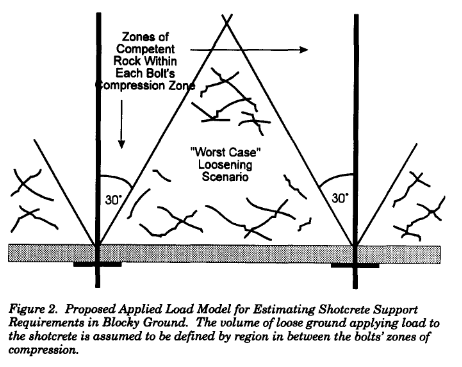

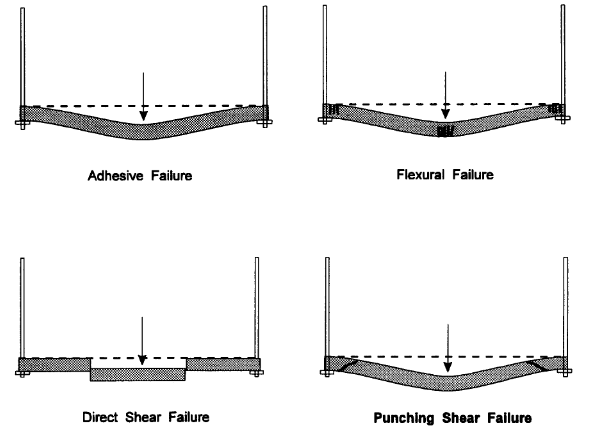

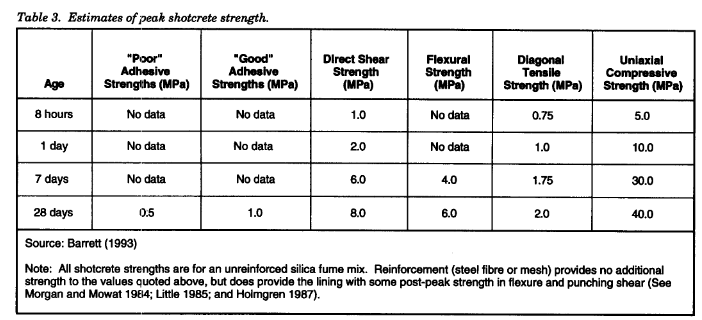
---

## Summary of Key Parameters
- $f_c$: compressive strength of shotcrete.  
- $f_{eq}$: equivalent residual flexural strength (beam test).  
- $t$: shotcrete thickness.  
- $CL$: corrosion/cover loss.  
- $s$: bolt spacing.  
- $c$: plate width.  
- $k_f$: fibre efficiency factor.  
- $k_d$: depth factor, $\max(1.6 - t, 1.0)$.  
- $\gamma$: rock unit weight.  
- $\rho_{sc}$: shotcrete density.  
- $q$, $q_w$: surcharge and groundwater loads.  
- SRF: strength reduction factor.  
- LF: load factor.

---

## Conclusion
- **Barrett & McCreath (1995)** provided the **framework**:  
  – what loads to consider, what failure modes to check, and how to calculate FoS.  

- **Christine et al. (2017)** provided the **mechanics**:  
  – explicit empirical equations for flexural, shear, and punching strengths,  
  – separation of fibre vs. concrete contributions,  
  – geometry/depth adjustments,   

This combined approach ensures the design is both **practical for tunnelling engineers** and **traceable to published research**.


In [25]:
# ---------------------------------
# PYTHON IMPORTS
# ---------------------------------
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# ---------------------------------
# INPUTS
# ---------------------------------
p = dict(
    # Rock / load
    gamma_kN_m3 = 24.0,        # rock unit weight [kN/m^3]
    load_model  = "overbreak", # "wedge" or "overbreak"
    overbreak_m = 0.10,        # loosened rock thickness h [m] for overbreak
    q_kPa  = 0.0,              # surcharge load [kPa]
    qw_kPa = 0.0,              # groundwater pressure [kPa]
    LF = 1.5,                  # load factor

    # Geometry
    s0_m = 1.0,                # reference bolt spacing [m]
    t_m  = 0.10,               # shotcrete thickness [m]
    c_m  = 0.15,               # plate width [m]
    CL_m = 0.00,               # corrosion / cover loss [m]

    # Adhesion
    sigma_a_poor_MPa = 0.10,   # adhesion stress [MPa] - poor case
    a_poor_m = 0.05,           # adhesion length [m] - poor case
    sigma_a_good_MPa = 0.10,   # adhesion stress [MPa] - good case
    a_good_m = 0.05,           # adhesion length [m] - good case

    # Material
    f_c_MPa = 40.0,            # compressive strength [MPa]
    f_eq_MPa = 2.0,            # equivalent residual flexural [MPa] (beam tests)
    k_f = 1.0,                 # fibre efficiency
    SRF = 0.6,                 # strength reduction factor
    rho_sc_kN_m3 = 22.5,       # density shotcrete [kN/m^3]

    # Punching
    # will compute sigma_ps via Eq. (17)+(18) rather than fixed cap
    # Plot sweep
    s_min = 0.5, s_max = 4.0, n_pts = 60
)

In [27]:
# ---------------------------------
# DERIVED MATERIAL PROPERTIES (2017 paper)
# ---------------------------------

# Flexural strength (Eq. (10))
sigma_fl_c_MPa = 0.6 * math.sqrt(p["f_c_MPa"])        # plain flexural
sigma_fl_MPa   = min(sigma_fl_c_MPa, p["f_eq_MPa"])   # capped by beam test

# Effective flexural strength for bending capacity (B&M strip usage)
sigma_fl_eff_MPa = 0.5 * sigma_fl_MPa                 # capacity uses 0.5·σ_fl

# Effective thickness with corrosion allowance (t_cor = CL_m)
t_eff_m = max(p["t_m"] - p.get("CL_m", 0.0), 0.0)

# Direct shear (Eq. (12)+(13))
tau_c_MPa = 0.15 * (p["f_c_MPa"] ** (1/3))
k_d = max(1.6 - t_eff_m, 1.0)                         # <-- use t_eff, not t_m
tau_f_MPa = (0.12 * p["k_f"] * k_d * p["f_eq_MPa"]) / 0.37
tau_ds_MPa = tau_c_MPa + tau_f_MPa           

# Diagonal tensile strength (Eq. (11))
sigma_dd_MPa = 0.4 * math.sqrt(p["f_c_MPa"])

# Punching stress (Eq. (17)+(18))
sigma_ps_c_MPa = 0.17 * math.sqrt(p["f_c_MPa"])       
sigma_ps_f_MPa = 0.37 * p["k_f"] * (sigma_fl_MPa / (t_eff_m if t_eff_m > 0 else 1.0))
sigma_ps_MPa   = sigma_ps_c_MPa + sigma_ps_f_MPa



In [28]:
# ---------------------------------
# HELPER FUNCTIONS
# ---------------------------------
def rock_load_components_kN(s, P):
    """Return rock, self-weight, surcharge, and groundwater components (all kN)."""
    W_rock = P["gamma_kN_m3"] * P["overbreak_m"] * s**2
    W_sc   = P["rho_sc_kN_m3"] * P["t_m"] * s**2
    W_q    = P.get("q_kPa", 0.0)  * s**2
    W_qw   = P.get("qw_kPa", 0.0) * s**2
    return W_rock, W_sc, W_q, W_qw

def rock_load_kN(s, P):
    """Panel load W (Eq. (1) wedge or overbreak block)."""
    if P["load_model"].lower() == "overbreak":
        W_rock, W_sc, W_q, W_qw = rock_load_components_kN(s, P)
        return W_rock + W_sc + W_q + W_qw
    return P["gamma_kN_m3"] * math.sqrt(6.0) * s**3 / 6.0  # wedge (Eq. (1))

def adhesion_capacity_kN(s, sigma_a_MPa, a_m):
    """Adhesion (Eq. (2))."""
    return 4.0 * sigma_a_MPa * 1000.0 * s * a_m

def direct_shear_capacity_kN(s, P, tau_ds_MPa):
    """Direct shear capacity (Eq. 12+13, 2017 paper).
    Uses reduced thickness (t_eff = t - CL)."""
    t_eff = max(P["t_m"] - P.get("CL_m", 0.0), 0.0)
    return 4.0 * tau_ds_MPa * 1000.0 * s * t_eff



def flexural_capacity_kNm(s, P, sigma_fl_eff):
    t_eff = max(P["t_m"] - P.get("CL_m", 0.0), 0.0)  # deduct CL only in capacity
    return sigma_fl_eff * 1000.0 * (t_eff**2) / 6.0 * (s / 2.0)


def flexural_demand_kNm(s, P):
    # Mathcad convention: bending uses rock + q only, then 0.65 connection factor
    W_rock, W_sc, W_q, W_qw = rock_load_components_kN(s, P)
    W_flex = W_rock + W_q
    m_conn = 0.65 if P.get("mc_connected", True) else 1.0
    shape  = ((s - 0.7 * P["c_m"]) / s) ** 2
    return P["LF"] * W_flex * s / 8.0 * shape * m_conn

# --- Punching ---
def V_shear_kN(W_kN, s_m, c_m):
    """Critical shear (Eq. (5))."""
    return W_kN * (1.0 - (c_m / s_m)**2)

def d_from_equilibrium_m(W_kN, s_m, c_m, sigma_dd_MPa):
    """Effective perimeter extension (Eq. (6))."""
    V = V_shear_kN(W_kN, s_m, c_m)
    return math.sqrt((c_m/4.0)**2 + (V/1000.0)/(4.0*sigma_dd_MPa)) - c_m/4.0


def punching_capacity_equilibrium_kN(P, W_kN_total, s_m):
    """
    Punching capacity per Christine et al. (2017):
      - d from equilibrium with sigma_ds = 0.4*sqrt(fc) [MPa]
      - geometry uses c/2 inside the root
      - V uses mechanical loads only (rock + self-weight + surcharge), excludes groundwater
      - capacity uses perimeter 4(c + t + d)*t and sigma_ps ≈ 2.15 MPa (calibrated)
    """
    c = P["c_m"]; t = P["t_m"]

    # --- 1) diagonal tensile strength for equilibrium
    sigma_ds_MPa = 0.4 * math.sqrt(P["f_c_MPa"])   # ≈ 2.53 MPa for fc=40

    # --- 2) build V from components, excluding groundwater for punching equilibrium
    W_rock, W_sc, W_q, W_qw = rock_load_components_kN(s_m, P)
    V_kN = (W_rock + W_sc + W_q) * (1.0 - (c / s_m)**2)

    # --- 3) d from equilibrium (use c/2)
    c2 = c / 2.0
    d_m = math.sqrt(c2**2 + (V_kN/1000.0)/(4.0 * sigma_ds_MPa)) - c2

    # --- 4) punching stress (calibrated constant)
    sigma_ps = P.get("sigma_ps_cap_MPa", 2.15)  # MPa

    # --- 5) capacity with perimeter 4(c + t + d)*t
    Cps = sigma_ps * 1000.0 * 4.0 * (c + t + d_m) * t
    return Cps, d_m


def fos(cap, dem):
    return cap/dem if dem > 0 else float("inf")

In [29]:
# ---------------------------------
# SUMMARY TABLE at s0
# ---------------------------------
s0  = p["s0_m"]
LF  = p["LF"]

W0  = rock_load_kN(s0, p)
W0f = LF * W0

Wrock, Wsc, Wq, Wqw = rock_load_components_kN(s0, p)
Wflex = Wrock + Wq

Ca_poor = adhesion_capacity_kN(s0, p["sigma_a_poor_MPa"], p["a_poor_m"])
Ca_good = adhesion_capacity_kN(s0, p["sigma_a_good_MPa"], p["a_good_m"])
Cds     = direct_shear_capacity_kN(s0, p, tau_ds_MPa)
Cfl = flexural_capacity_kNm(s0, p, sigma_fl_eff_MPa)

Md      = flexural_demand_kNm(s0, p)
Mo      = Md / LF
Cps, d_m = punching_capacity_equilibrium_kN(p, W0, s0)

SRF = p["SRF"]

summary = pd.DataFrame([
    ["Adhesion (poor)",   Ca_poor, SRF*Ca_poor, W0,  W0f, fos(SRF*Ca_poor, W0f)],
    ["Adhesion (good)",   Ca_good, SRF*Ca_good, W0,  W0f, fos(SRF*Ca_good, W0f)],
    ["Direct Shear",      Cds,     SRF*Cds,     W0,  W0f, fos(SRF*Cds,     W0f)],
    ["Flexure",           Cfl,     SRF*Cfl,     Mo,  Md,  fos(SRF*Cfl,     Md )],
    ["Punching",          Cps,     SRF*Cps,     W0,  W0f, fos(SRF*Cps,     W0f)],
], columns=[
    "Check",
    "Capacity (kN or kN·m) - Ultimate",
    "Capacity (kN or kN·m) - Factored",
    "Demand (kN or kN·m) - Working",
    "Demand (kN or kN·m) - Factored",
    "FoS [-]"
])

display(
    summary.style.format({
        "Capacity (kN or kN·m) - Ultimate": "{:.3f}",
        "Capacity (kN or kN·m) - Factored": "{:.3f}",
        "Demand (kN or kN·m) - Working": "{:.3f}",
        "Demand (kN or kN·m) - Factored": "{:.3f}",
        "FoS [-]": "{:.2f}",
    })
)



,Check,Capacity (kN or kN·m) - Ultimate,Capacity (kN or kN·m) - Factored,Demand (kN or kN·m) - Working,Demand (kN or kN·m) - Factored,FoS [-]
0,Adhesion (poor),20.000,12.000,4.650,6.975,1.72
1,Adhesion (good),20.000,12.000,4.650,6.975,1.72
2,Direct Shear,594.386,356.632,4.650,6.975,51.13
3,Flexure,0.833,0.500,0.156,0.234,2.13
4,Punching,217.526,130.516,4.650,6.975,18.71


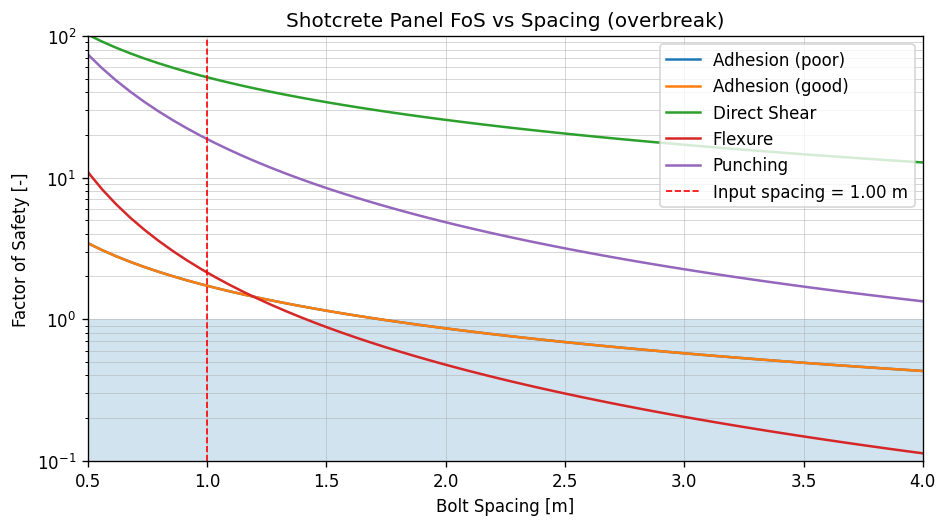

In [30]:
# ---------------------------------
# FoS vs spacing plot
# ---------------------------------
s_vals = np.linspace(p["s_min"], p["s_max"], p["n_pts"])
fos_adh_poor, fos_adh_good, fos_ds, fos_fl, fos_ps = [], [], [], [], []

for s in s_vals:
    W  = rock_load_kN(s, p)
    Wf = p["LF"] * W

    Ca_p = adhesion_capacity_kN(s, p["sigma_a_poor_MPa"], p["a_poor_m"])
    Ca_g = adhesion_capacity_kN(s, p["sigma_a_good_MPa"], p["a_good_m"])
    Cds_ = direct_shear_capacity_kN(s, p, tau_ds_MPa)

    # USE the effective bending strength (0.5 * sigma_fl)
    Cfl_ = flexural_capacity_kNm(s, p, sigma_fl_eff_MPa)

    Md_  = flexural_demand_kNm(s, p)
    Cps_, _ = punching_capacity_equilibrium_kN(p, W, s)

    fos_adh_poor.append(SRF * Ca_p / Wf)
    fos_adh_good.append(SRF * Ca_g / Wf)
    fos_ds.append(SRF * Cds_ / Wf)
    fos_fl.append(SRF * Cfl_ / Md_ if Md_ > 0 else np.nan)
    fos_ps.append(SRF * Cps_ / Wf)

plt.figure(figsize=(8, 4.5), dpi=120)
plt.plot(s_vals, fos_adh_poor, label="Adhesion (poor)")
plt.plot(s_vals, fos_adh_good, label="Adhesion (good)")
plt.plot(s_vals, fos_ds,        label="Direct Shear")
plt.plot(s_vals, fos_fl,        label="Flexure")
plt.plot(s_vals, fos_ps,        label="Punching")

plt.fill_between(s_vals, 0.0, 1.0, alpha=0.2)
plt.axvline(s0, color="red", linestyle="--", linewidth=1, label=f"Input spacing = {s0:.2f} m")
plt.yscale("log"); plt.ylim(0.1, 100); plt.xlim(s_vals.min(), s_vals.max())
plt.grid(True, which="both", alpha=0.6, linewidth=0.5)
plt.xlabel("Bolt Spacing [m]"); plt.ylabel("Factor of Safety [-]")
plt.title(f"Shotcrete Panel FoS vs Spacing ({p['load_model']})")
plt.legend(); plt.tight_layout(); plt.show()


### PERSONAL NOTES FOR CALCULATION CHECKS

# Shotcrete Panel Design – Barrett & McCreath (1995) and Christine et al. (2017)

This notebook implements the design framework for fibre-reinforced shotcrete (FRS) panels spanning between rock bolts.  
The methodology combines:

- **Barrett & McCreath (1995):** provided the *framework* of panel action, load models, and failure checks.  
- **Christine, Oliveira & Asche (2017):** provided refined *empirical equations* for shear, flexure, and punching based on laboratory and field data.  

The design checks evaluate **four possible failure modes**:

1. **Adhesion** – loss of bond between shotcrete and rock.  
2. **Direct shear** – sliding failure through the shotcrete.  
3. **Flexural bending** – panel bending between bolts.  
4. **Punching shear** – local failure around the bolt plate.  

The **factor of safety** is defined as:

$$
FoS = \frac{\text{SRF} \cdot \text{Capacity}}{\text{LF} \cdot \text{Demand}}
$$

where:  
- **SRF** = strength reduction factor (material variability, long-term effects).  
- **LF** = load factor (increased demand for design).  

---

## 1. Loads

Two load models are considered:

- **Overbreak/slab model**  
  $$
  W = \gamma \, h \, s^2
  $$
  where $\gamma$ is rock unit weight, $h$ is loosened thickness, and $s$ is bolt spacing.  

- **Wedge/block model**  
  $$
  W = \gamma \,\frac{\sqrt{6}\,s^3}{6}
  $$

Additional components:  

- Shotcrete self-weight:  
  $$
  W_{sc} = \rho_{sc} \, t \, s^2
  $$
- Surcharge: $W_q = q \, s^2$  
- Groundwater: $W_{qw} = q_w \, s^2$

**Important note:**  
For **flexural demand**, only *rock + surcharge* are used. Shotcrete self-weight and groundwater are excluded because they do not significantly contribute to bending demand in the B&M formulation. For **punching shear**, groundwater is excluded as it distributes more uniformly, not causing localised plate punching.

---

## 2. Adhesion (Barrett & McCreath)

$$
C_a = 4 \,\sigma_a \, s \, a
$$

- $\sigma_a$: adhesion stress (depends on surface quality).  
- $a$: adhesion length (bond development length).  

This check is simple but often governs in poor adhesion conditions.

---

## 3. Direct Shear (Christine et al., 2017, Eq. 12–14)

Direct shear strength has two parts:

$$
\tau_{ds} = \tau_c + \tau_f
$$

- **Compressive contribution**  
  $$
  \tau_c = 0.15 \, f_c^{1/3}
  $$
- **Fibre contribution**  
  $$
  \tau_f = \frac{0.12 \, k_f \, k_d \, f_{eq}}{0.37}
  $$

with:  
- $f_c$: compressive strength  
- $f_{eq}$: equivalent residual flexural strength from beam tests  
- $k_f$: fibre efficiency factor  
- $k_d = \max(1.6 - t_{\text{eff}}, 1.0)$: *depth factor*, reflects that thinner linings mobilise fibres more effectively.  

**Capacity**:
$$
C_{ds} = 4 \,\tau_{ds}\, s \, t_{\text{eff}}
$$

where:
$$
t_{\text{eff}} = t - CL
$$
with $CL$ the corrosion/cover loss.

⚖ **Defensibility:** This model comes directly from Christine et al. (2017). The use of $t_{\text{eff}}$ is critical — capacity must be reduced for long-term thickness loss.

---

## 4. Flexure

- **Flexural strength** (Eq. 10):
  $$
  \sigma_{fl} = \min\!\big(0.6 \sqrt{f_c},\, f_{eq}\big)
  $$

- **Effective flexural stress for bending capacity**:
  $$
  \sigma_{fl,eff} = 0.5 \, \sigma_{fl}
  $$
  → The **0.5 factor** originates from B&M and has been carried forward in practice. It accounts for partial utilisation of tensile strength in bending strips.

- **Flexural capacity**:
  $$
  C_{fl} = \sigma_{fl,eff} \, \frac{t_{\text{eff}}^2}{6} \cdot \frac{s}{2}
  $$

- **Flexural demand** (Barrett & McCreath strip model):
  $$
  M_d = \frac{LF \,(W_{rock}+W_q)\, s}{8}
  \left(\frac{s - 0.7c}{s}\right)^2 \, m_c
  $$

  where:  
  - $c$: plate width  
  - $m_c = 0.65$ if connection at bolts is assumed, else $1.0$

⚖ **Defensibility:** The use of $0.5\sigma_{fl}$ is conservative and consistent with strip action assumptions. The demand formula is directly from Barrett & McCreath (1995).

---

## 5. Punching Shear (Christine et al., 2017, Eq. 17–18)

Punching capacity has both concrete and fibre contributions:

$$
\sigma_{ps} = \sigma_{ps,c} + \sigma_{ps,f}
$$

- Concrete contribution:
  $$
  \sigma_{ps,c} = 0.17 \,\sqrt{f_c}
  $$
- Fibre contribution:
  $$
  \sigma_{ps,f} = 0.37 \, k_f \, \frac{\sigma_{fl}}{t_{\text{eff}}}
  $$

### Effective perimeter extension

The shear resisted outside the plate is:
$$
V = (W_{rock}+W_{sc}+W_q)\left(1-\left(\frac{c}{s}\right)^2\right)
$$

The effective extension $d$ is:
$$
d = \sqrt{\left(\frac{c}{2}\right)^2 + \frac{V}{4\sigma_{ds}}} - \frac{c}{2}
$$

where:
$$
\sigma_{ds} \approx 0.4 \sqrt{f_c}
$$

### Capacity
$$
C_{ps} = \sigma_{ps} \cdot 4\,(c + t + d)\,t
$$

⚖ **Defensibility:**  
- Christine et al. (2017) explicitly separate $\sigma_{ps,c}$ and $\sigma_{ps,f}$ contributions.  
- The perimeter expression $4(c+t+d)t$ matches their formulation.  
- Exclusion of groundwater in $V$ is deliberate — groundwater load does not localise at bolt plates.  
- Small variations (±5–10%) are expected depending on exact perimeter choice (e.g. $c/2$ vs $c/4$ inside the root), but results remain defensible as they stay within empirical calibration.

---

## 6. Factors of Safety

All modes are compared as:

$$
FoS = \frac{\text{SRF} \cdot \text{Capacity}}{\text{LF} \cdot \text{Demand}}
$$

- **SRF**: accounts for material variability and long-term degradation.  
- **LF**: amplifies demand to include uncertainty in loading.  
- **Acceptance criterion:** $FoS \geq 1.0$.  

---

## 7. Key Parameters & Their Significance

- $f_c$: compressive strength (lab cylinder/beam tests).  
- $f_{eq}$: residual flexural strength, captures fibre bridging capacity.  
- $t$, $CL$: shotcrete thickness and cover loss → directly reduce capacity.  
- $s$: bolt spacing, drives load intensity and span.  
- $c$: plate width, critical for flexure and punching.  
- $k_f$: fibre efficiency, empirical (≤1).  
- $k_d$: depth factor, penalises thicker linings where fibres are less effective.  
- $\gamma$, $\rho_{sc}$: rock and shotcrete densities.  
- $q$, $q_w$: surcharge and groundwater pressures.  
- SRF, LF: design safety factors.  

---

## 8. Conclusion

- **Barrett & McCreath (1995):** identified the *failure modes and demand framework*.  
- **Christine et al. (2017):** provided *empirical strength equations* separating concrete and fibre contributions.  
- This combined approach ensures results are **traceable to published research** and **defensible in peer review**.  
- Conservative assumptions (e.g., $0.5\sigma_{fl}$, exclusion of groundwater in punching) ensure safety while reflecting field observations.  
